In [ ]:
import pandas as pd
# SST Data set import and considered the nd values as na or missing
df1 = pd.read_csv("https://github.com/Feba01/Dissertation/raw/refs/heads/main/global_bleaching_environmental.csv", na_values=["nd"])

In [ ]:
# GLODAP datset import
df2 = pd.read_csv("https://github.com/Feba01/Dissertation/raw/refs/heads/main/GLODAPv2.2023_Merged_Master_File.csv", na_values=[-9999])

/tmp/ipython-input-3-3333468859.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("https://github.com/Feba01/Dissertation/raw/refs/heads/main/GLODAPv2.2023_Merged_Master_File.csv", na_values=[-9999])


In [ ]:
len(df1)

41361

In [ ]:
len(df2)

1402829

In [ ]:
column_names = df1.columns.tolist()
print(column_names)

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW

In [ ]:
columns_to_drop = [
    'Bleaching_Comments',
    'Bleaching_Level',
    'Percent_Cover',
    'Reef_ID',
    'Sample_Comments',
    'Site_Comments',
    'Site_Name',
    'Substrate_Name'
]

# Drop the columns (ignore errors if some columns don't exist)
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
column_names = df1.columns.tolist()
print(column_names)

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Date']


In [ ]:
# Missing values in df1
pd.set_option('display.max_rows', None)

df1.isna().sum()

,0
Site_ID,0
Sample_ID,0
Data_Source,0
Latitude_Degrees,0
Longitude_Degrees,0
Ocean_Name,0
Realm_Name,0
Ecoregion_Name,3
Country_Name,1
State_Island_Province_Name,99


In [ ]:
#Remaining rows after dropping rows with nd
remaining_rows = df1.dropna().shape[0]
print("Number of rows remaining after dropping missing values:", remaining_rows)

Number of rows remaining after dropping missing values: 31799


In [ ]:
df1['Country_Name'] = df1['Country_Name'].fillna('Unknown')
df1['State_Island_Province_Name'] = df1['State_Island_Province_Name'].fillna('Unknown')
df1['City_Town_Name'] = df1['City_Town_Name'].fillna('Unknown')
df1['Ecoregion_Name'] = df1['Ecoregion_Name'].fillna('Unknown')

print("Imputation done. Missing values remaining in these columns:")
print(df1[['Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Ecoregion_Name']].isnull().sum())

Imputation done. Missing values remaining in these columns:
Country_Name                  0
State_Island_Province_Name    0
City_Town_Name                0
Ecoregion_Name                0
dtype: int64


In [ ]:
# Columns you want to exclude from the null check
exclude_cols = [
    "Percent_Bleaching",
    "Temperature_Kelvin", "Temperature_Minimum", "Temperature_Kelvin_Standard_Deviation",
    "Temperature_Maximum", "Temperature_Mean", "SSTA_FrequencyMean",
    "SSTA_DHW_Standard_Deviation", "TSA_Mean", "TSA_DHW_Standard_Deviation",
    "TSA_Frequency_Standard_Deviation", "TSA_FrequencyMax", "SSTA_DHWMean",
    "TSA_Standard_Deviation", "TSA_Minimum", "TSA_Maximum", "SSTA_DHWMax",
    "TSA_DHWMean", "TSA_FrequencyMean"
]

# Columns to check for nulls
cols_to_check = [col for col in df1.columns if col not in exclude_cols]

# Drop rows where any of these columns have nulls
df_no_nulls = df1.dropna(subset=cols_to_check)

# Print number of remaining rows
print(f"Number of rows remaining after dropping rows with nulls (excluding specified columns): {df_no_nulls.shape[0]}")

Number of rows remaining after dropping rows with nulls (excluding specified columns): 39378


In [ ]:
!pip install missingno

<Figure size 2000x800 with 0 Axes>

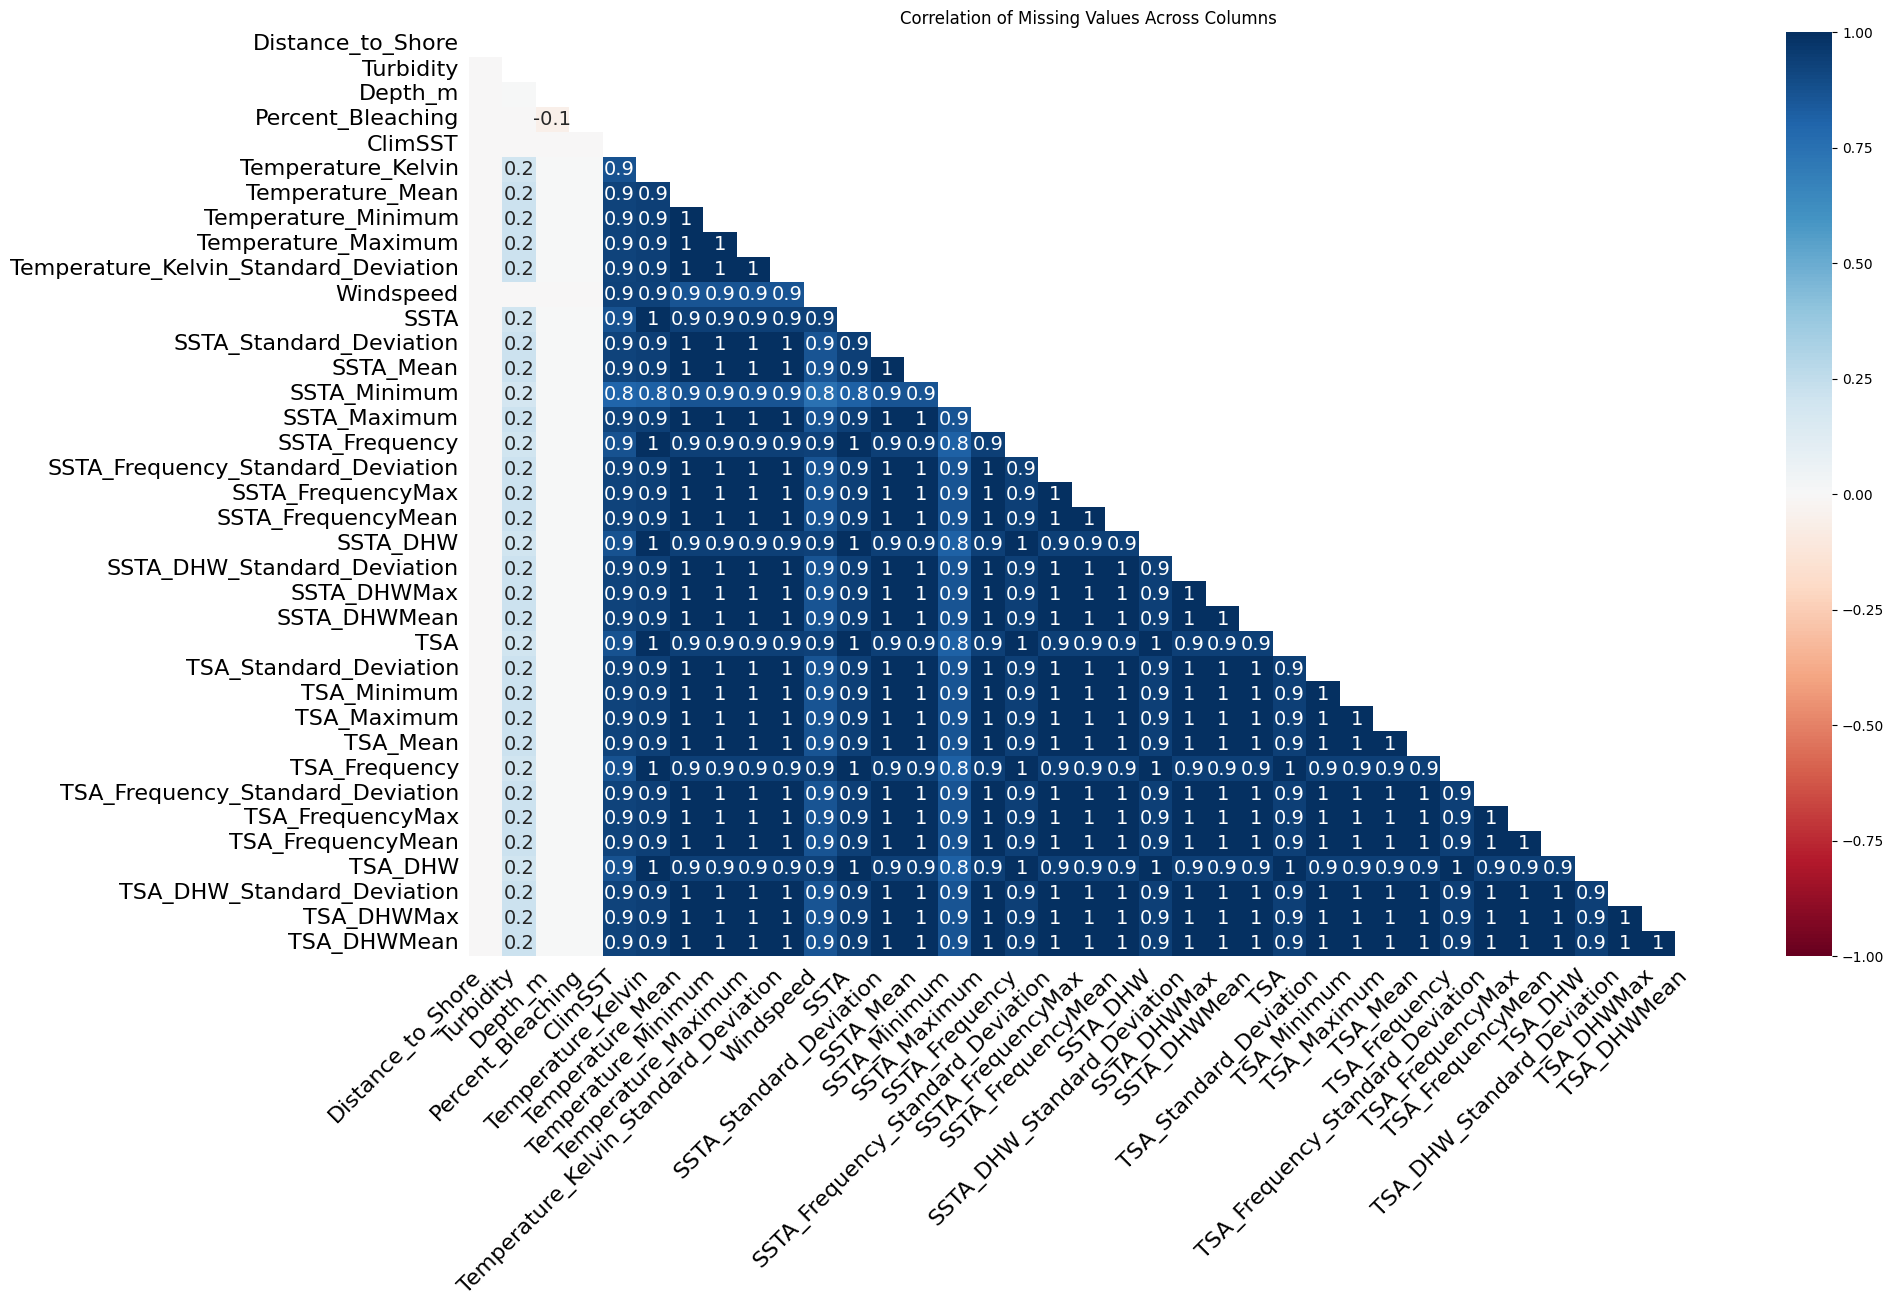

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
# Heatmap (Correlation of Missing Data)
plt.figure(figsize=(20, 8))
msno.heatmap(df1)
plt.title("Correlation of Missing Values Across Columns")
plt.show()

There is no correlation between the missing values in the Target Variable column (Percent_Bleaching) and the other columns. Hence normal imputation will be performed for the column.

In [ ]:
missing_percent = df1.isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])

Percent_Bleaching                        0.165518
Depth_m                                  0.043495
SSTA_Minimum                             0.004255
Temperature_Kelvin                       0.003578
SSTA                                     0.003578
SSTA_Frequency                           0.003578
SSTA_DHW                                 0.003578
TSA                                      0.003578
TSA_DHW                                  0.003578
TSA_Frequency                            0.003578
Temperature_Minimum                      0.003191
SSTA_Standard_Deviation                  0.003191
SSTA_Mean                                0.003191
SSTA_Frequency_Standard_Deviation        0.003191
Temperature_Kelvin_Standard_Deviation    0.003191
Temperature_Maximum                      0.003191
Temperature_Mean                         0.003191
SSTA_FrequencyMean                       0.003191
SSTA_Maximum                             0.003191
SSTA_FrequencyMax                        0.003191


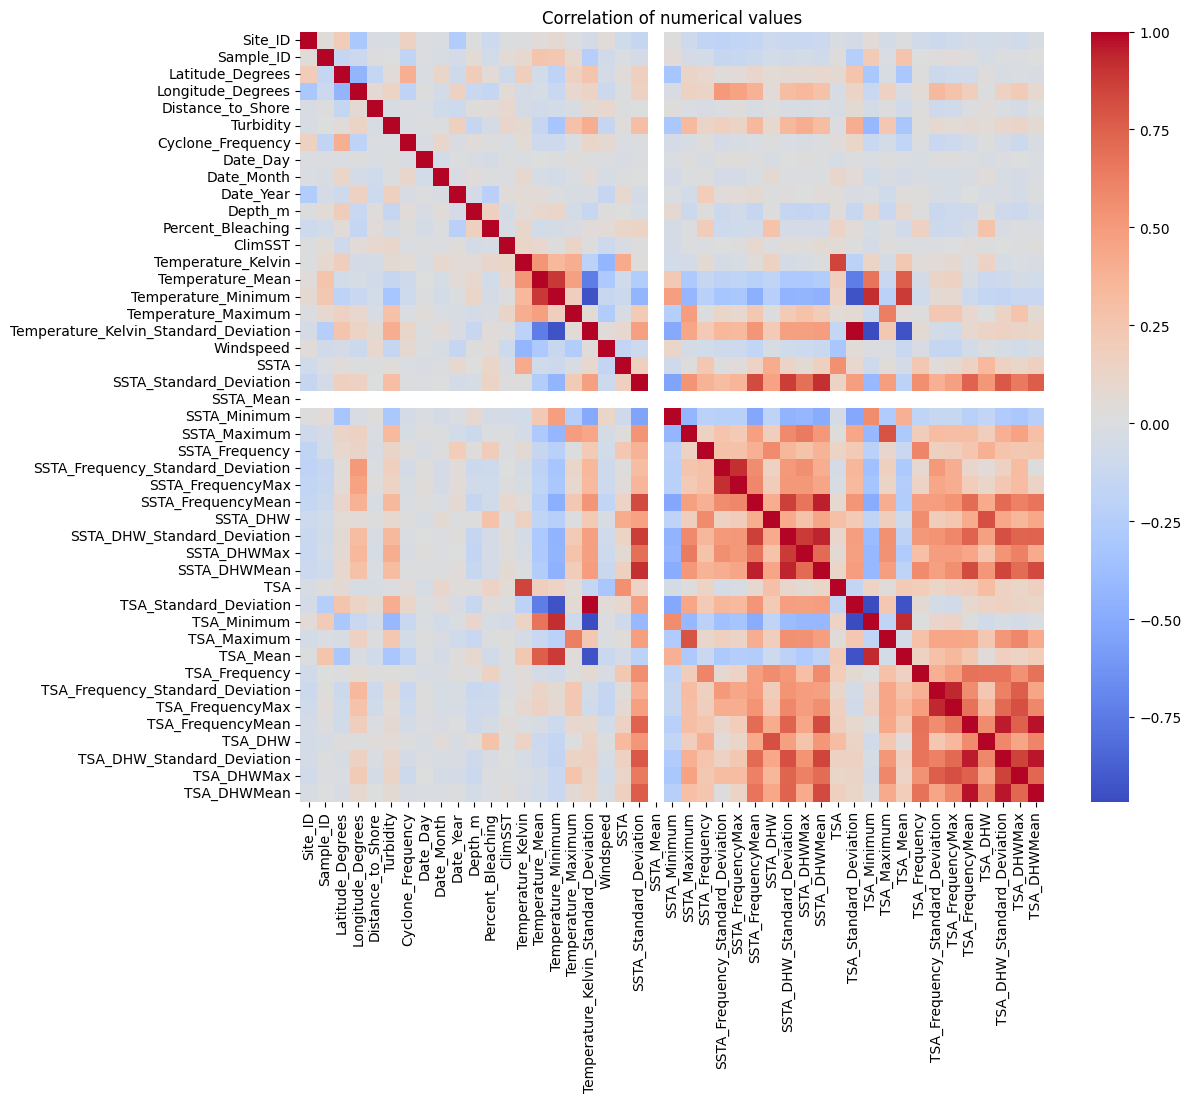

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
numerical_cols = df1.select_dtypes(include=['number']).columns.tolist()
sns.heatmap(df1[numerical_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation of numerical values")
plt.show()

In [ ]:
print(df1[numerical_cols].corr())

                                        Site_ID  Sample_ID  Latitude_Degrees  \
Site_ID                                1.000000   0.040154          0.206015   
Sample_ID                              0.040154   1.000000         -0.145952   
Latitude_Degrees                       0.206015  -0.145952          1.000000   
Longitude_Degrees                     -0.299677  -0.109525         -0.437152   
Distance_to_Shore                     -0.016806   0.021499         -0.148586   
Turbidity                             -0.026555   0.015087          0.047481   
Cyclone_Frequency                      0.154447  -0.173184          0.394547   
Date_Day                              -0.000368   0.001362         -0.006881   
Date_Month                            -0.011122  -0.021773          0.117873   
Date_Year                             -0.259429  -0.048437         -0.083661   
Depth_m                                0.007411   0.061040          0.190214   
Percent_Bleaching                     -0

As the target variable's missingness is MCAR although it's missing data perc is more than 5%, it's null value rows will be dropped as it's missigness is MCAR

In [ ]:
df1 = df1.dropna(subset=['Percent_Bleaching'])
print(len(df1))

34515


In [ ]:
skew_value = df1[['Depth_m', 'Distance_to_Shore', 'ClimSST']].skew()
for col, val in skew_value.items():
    print(f"{col} skewness: {val:.2f}")

Depth_m skewness: 1.27
Distance_to_Shore skewness: 9.31
ClimSST skewness: -1.67


As the variables Depth_m, Distance_to_Shore and ClimSST have missigness that is MCAR, and s the data is highly skewed in these columns, a median imputation will be perfomed.

In [ ]:
# List of columns to impute
columns_to_impute = ['Depth_m', 'Distance_to_Shore', 'ClimSST']

# Performing median imputation
for col in columns_to_impute:
    median_value = df1[col].median()
    df1[col].fillna(median_value, inplace=True)
    print(f"{col}: imputed missing values with median = {median_value:.2f}")

Depth_m: imputed missing values with median = 6.00
Distance_to_Shore: imputed missing values with median = 476.03
ClimSST: imputed missing values with median = 300.80


/tmp/ipython-input-20-2411368116.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(median_value, inplace=True)
/tmp/ipython-input-20-2411368116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].fillna(median_value, inplace=True)


In [ ]:
df1.isna().sum()

,0
Site_ID,0
Sample_ID,0
Data_Source,0
Latitude_Degrees,0
Longitude_Degrees,0
Ocean_Name,0
Realm_Name,0
Ecoregion_Name,0
Country_Name,0
State_Island_Province_Name,0


In [ ]:
print(len(df1))

34515


In [ ]:
 import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

def mice_impute_with_rmses(df, target_cols, corr_matrix, min_corr=0.4):
    df_result = df.copy()
    rmse_results = {}
    np.random.seed(42)

    # Create masked version for validation
    mask_matrix = df_result[target_cols].notnull() & (np.random.rand(*df_result[target_cols].shape) < 0.05)
    df_maskeds = df_result.copy()
    df_maskeds[target_cols] = df_maskeds[target_cols].mask(mask_matrix)
    ground_truth = df_result[target_cols].copy()

    for target in target_cols:
        # Select predictors that correlate at least min_corr with the target
        predictors = corr_matrix[target].abs()
        selected_predictors = predictors[predictors >= min_corr].index.tolist()
        selected_predictors = [col for col in selected_predictors if col != target and col in df_maskeds.columns]

        if len(selected_predictors) < 1:
            print(f"No strong predictors found for '{target}'. Using all numerical cols instead.")
            selected_predictors = [col for col in target_cols if col != target]

        # Impute using MICE
        cols_for_impute = selected_predictors + [target]
        imputer = IterativeImputer(random_state=0, max_iter=10)
        imputed_array = imputer.fit_transform(df_maskeds[cols_for_impute])
        imputed_df = pd.DataFrame(imputed_array, columns=cols_for_impute, index=df_maskeds.index)
        df_maskeds[target] = imputed_df[target]

        # Compute RMSE
        mask = mask_matrix[target].values
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth[target][mask], df_maskeds[target][mask]))
            std_dev = ground_truth[target].std()
            relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[target] = {
                'RMSE': rmse,
                'StdDev': std_dev,
                'Relative_RMSE (%)': relative_rmse
            }
            print(f"MICE imputation done for '{target}' | Relative RMSE: {relative_rmse:.2f}%")

    rmse_df = pd.DataFrame(rmse_results).T.round(2)
    print("\nFinal RMSE summary:\n", rmse_df)

    return df_maskeds, rmse_df

# Example usage
numerical_cols = [
    'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
    'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed',
    'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
    'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
    'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax',
    'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum',
    'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation',
    'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
    'TSA_DHWMax', 'TSA_DHWMean', "Turbidity"
]

corr_matrix = df1[numerical_cols].corr()
df1_imputed, rmse_df = mice_impute_with_rmses(df1, numerical_cols, corr_matrix)

# Save the imputation changes to df1
df1_cleaned = df1_imputed.copy()

MICE imputation done for 'Temperature_Kelvin' | Relative RMSE: 38.35%
MICE imputation done for 'Temperature_Mean' | Relative RMSE: 20.12%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'Temperature_Minimum' | Relative RMSE: 14.30%
MICE imputation done for 'Temperature_Maximum' | Relative RMSE: 50.16%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'Temperature_Kelvin_Standard_Deviation' | Relative RMSE: 9.21%
MICE imputation done for 'Windspeed' | Relative RMSE: 88.58%
MICE imputation done for 'SSTA' | Relative RMSE: 80.36%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Standard_Deviation' | Relative RMSE: 35.18%
No strong predictors found for 'SSTA_Mean'. Using all numerical cols instead.


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Mean' | Relative RMSE: nan%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Minimum' | Relative RMSE: 69.33%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Maximum' | Relative RMSE: 50.77%
MICE imputation done for 'SSTA_Frequency' | Relative RMSE: 76.30%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Frequency_Standard_Deviation' | Relative RMSE: 38.60%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_FrequencyMax' | Relative RMSE: 41.66%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_FrequencyMean' | Relative RMSE: 15.71%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHW' | Relative RMSE: 50.48%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHW_Standard_Deviation' | Relative RMSE: 11.04%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHWMax' | Relative RMSE: 22.52%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHWMean' | Relative RMSE: 9.63%
MICE imputation done for 'TSA' | Relative RMSE: 51.35%
MICE imputation done for 'TSA_Standard_Deviation' | Relative RMSE: 8.93%
MICE imputation done for 'TSA_Minimum' | Relative RMSE: 13.49%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_Maximum' | Relative RMSE: 39.17%
MICE imputation done for 'TSA_Mean' | Relative RMSE: 10.77%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_Frequency' | Relative RMSE: 49.27%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_Frequency_Standard_Deviation' | Relative RMSE: 23.23%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_FrequencyMax' | Relative RMSE: 26.02%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_FrequencyMean' | Relative RMSE: 16.88%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_DHW' | Relative RMSE: 52.47%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_DHW_Standard_Deviation' | Relative RMSE: 7.11%
MICE imputation done for 'TSA_DHWMax' | Relative RMSE: 26.15%
MICE imputation done for 'TSA_DHWMean' | Relative RMSE: 7.85%
MICE imputation done for 'Turbidity' | Relative RMSE: 79.07%

Final RMSE summary:
                                        RMSE  StdDev  Relative_RMSE (%)
Temperature_Kelvin                     0.76    1.98              38.35
Temperature_Mean                       0.31    1.56              20.12
Temperature_Minimum                    0.38    2.67              14.30
Temperature_Maximum                    0.65    1.30              50.16
Temperature_Kelvin_Standard_Deviation  0.07    0.73               9.21
Windspeed                              1.83    2.07              88.58
SSTA                                   0.67    0.83              80.36
SSTA_Standard_Deviation                0.08    0.23              35.18
SSTA_Mean                              0.00    0.00                NaN
SSTA_M

In [ ]:
# Missing values in df1
pd.set_option('display.max_rows', None)

df1_cleaned = df1_imputed.copy()
df1_cleaned.isna().sum()

,0
Site_ID,0
Sample_ID,0
Data_Source,0
Latitude_Degrees,0
Longitude_Degrees,0
Ocean_Name,0
Realm_Name,0
Ecoregion_Name,0
Country_Name,0
State_Island_Province_Name,0


In [ ]:
df1_cleaned.to_csv("BCO_DMO_clean.csv", index=False)

In [ ]:
num_columns = len(df2.columns)
print("Number of columns:", num_columns)

Number of columns: 109


In [ ]:
# Missing values in df2
pd.set_option('display.max_rows', None)

df2.isna().sum()

,0
G2expocode,0
G2cruise,0
G2station,0
G2region,0
G2cast,546
G2year,0
G2month,0
G2day,0
G2hour,18325
G2minute,18324


In [ ]:
# Removing all columns that end with 'f', 'err' and 'qc'
df2 = df2.loc[:, ~df2.columns.str.endswith(('f', 'err', 'qc'))]

In [ ]:
column_names = df2.columns.tolist()
print("The remaining columns after removing columns that end with 'f', 'err' and 'qc' are:", column_names)

The remaining columns after removing columns that end with 'f', 'err' and 'qc' are: ['G2expocode', 'G2cruise', 'G2station', 'G2region', 'G2cast', 'G2year', 'G2month', 'G2day', 'G2hour', 'G2minute', 'G2latitude', 'G2longitude', 'G2bottomdepth', 'G2maxsampdepth', 'G2bottle', 'G2pressure', 'G2depth', 'G2temperature', 'G2theta', 'G2salinity', 'G2sigma0', 'G2sigma1', 'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma', 'G2oxygen', 'G2aou', 'G2nitrate', 'G2nitrite', 'G2silicate', 'G2phosphate', 'G2tco2', 'G2talk', 'G2fco2', 'G2fco2temp', 'G2phts25p0', 'G2phtsinsitutp', 'G2cfc11', 'G2pcfc11', 'G2cfc12', 'G2pcfc12', 'G2cfc113', 'G2pcfc113', 'G2ccl4', 'G2pccl4', 'G2sf6', 'G2psf6', 'G2c13', 'G2c14', 'G2h3', 'G2he3', 'G2he', 'G2neon', 'G2o18', 'G2toc', 'G2doc', 'G2don', 'G2tdn', 'G2chla', 'G2doi']


In [ ]:
# Removing all columns other than necessary ones frpm the GLODAP datset
# List of columns to keep
columns_to_keep = [
    'G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region',
    'G2year', 'G2month', 'G2day', 'G2latitude', 'G2longitude',
    'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk',
    'G2salinity', 'G2phts25p0', 'G2phtsinsitutp', 'G2temperature',
    'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1', 'G2sigma2',
    'G2sigma3', 'G2sigma4', 'G2gamma', 'G2nitrate', 'G2nitrite',
    'G2phosphate'
]

# Keep only those columns in the DataFrame
df2 = df2[columns_to_keep]

df2.head()

,G2expocode,G2cruise,G2station,G2cast,G2region,G2year,G2month,G2day,G2latitude,G2longitude,...,G2pressure,G2sigma0,G2sigma1,G2sigma2,G2sigma3,G2sigma4,G2gamma,G2nitrate,G2nitrite,G2phosphate
0,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,8.6,26.778,31.489,36.093,40.593,44.990,NaN,NaN,NaN,NaN
1,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,8.6,26.665,31.372,35.974,40.471,44.866,NaN,NaN,NaN,NaN
2,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,48.9,27.787,32.429,36.968,41.403,45.738,NaN,NaN,NaN,NaN
3,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,48.9,27.785,32.427,36.965,41.401,45.736,NaN,NaN,NaN,NaN
4,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,148.0,27.919,32.557,37.091,41.523,45.854,NaN,NaN,NaN,NaN


In [ ]:
 missing_percent = df2.isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])

G2fco2            0.677380
G2phtsinsitutp    0.650436
G2phts25p0        0.649264
G2talk            0.645974
G2tco2            0.608707
G2nitrite         0.414845
G2phosphate       0.237144
G2nitrate         0.199298
G2gamma           0.130633
G2oxygen          0.106963
G2theta           0.027836
G2sigma2          0.027836
G2sigma3          0.027836
G2sigma4          0.027836
G2sigma1          0.027836
G2sigma0          0.027836
G2salinity        0.020514
G2temperature     0.007499
G2pressure        0.005603
G2depth           0.001939
G2cast            0.000389
dtype: float64


<Figure size 2000x800 with 0 Axes>

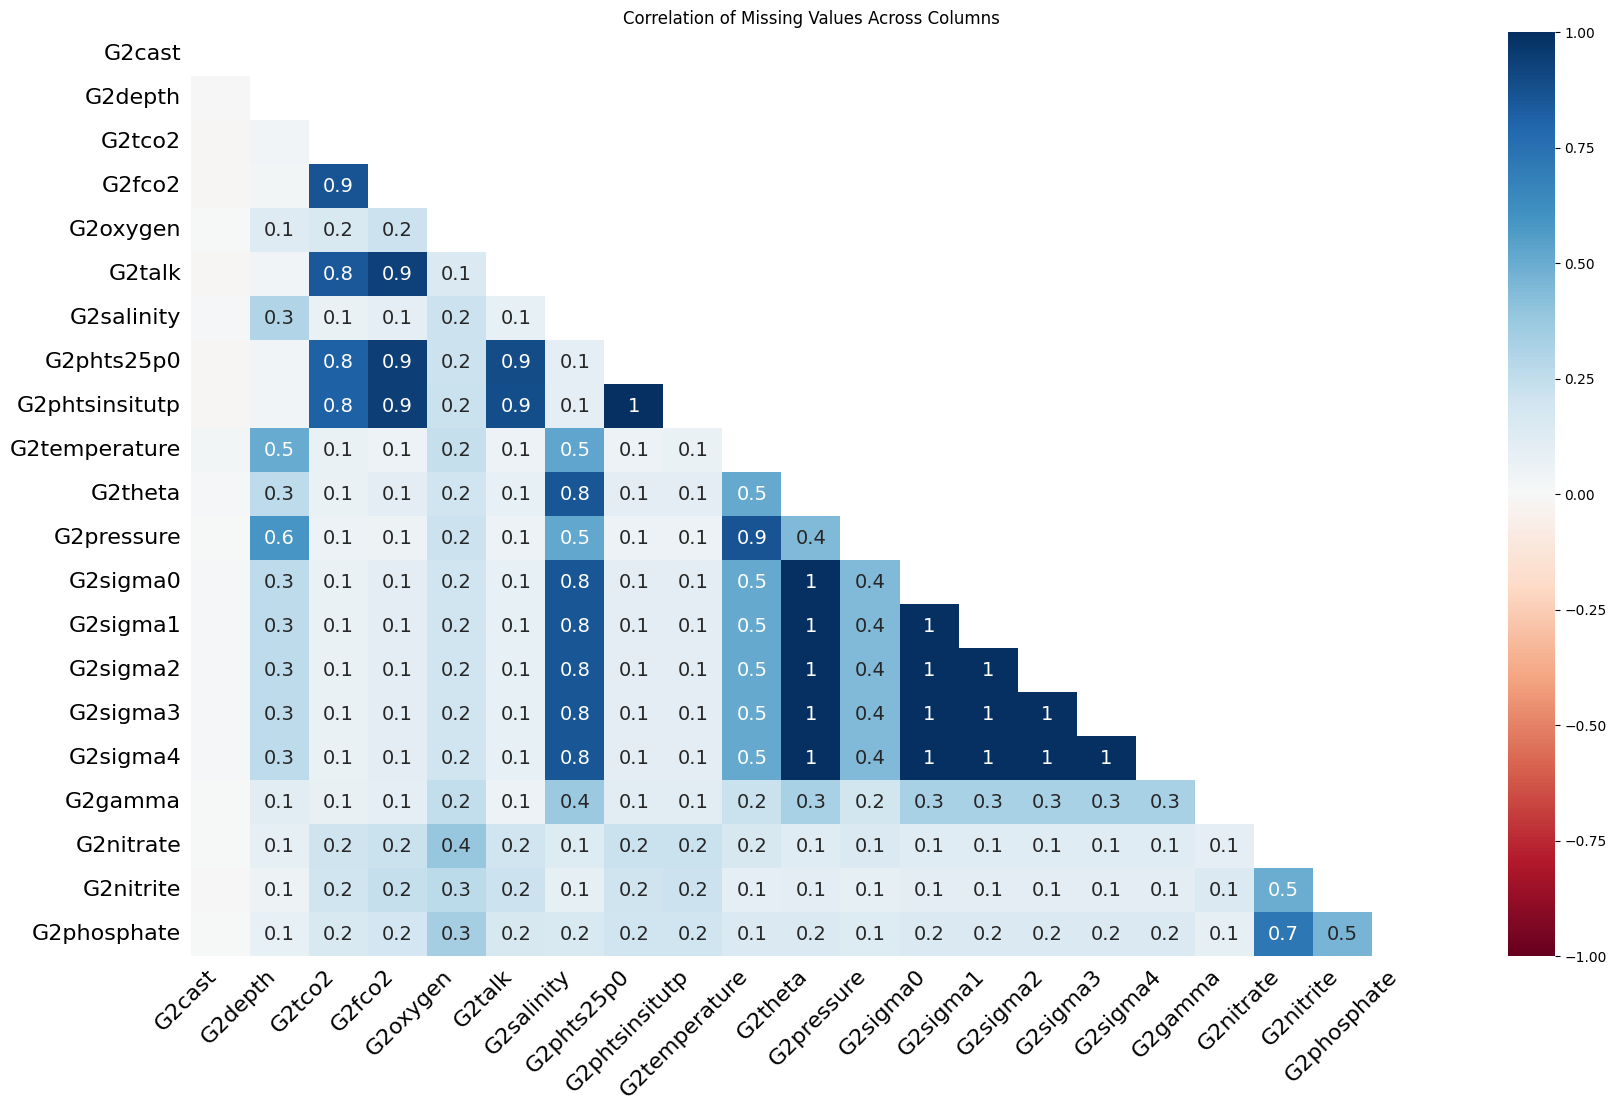

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
# Heatmap (Correlation of Missing Data)
plt.figure(figsize=(20, 8))
msno.heatmap(df2)
plt.title("Correlation of Missing Values Across Columns")
plt.show()

In [ ]:
import pandas as pd

def mar_correlation_analysis(df2):
    """
    Computes correlation between missingness indicators of variables with missing data
    and variables with complete data, without modifying the original DataFrame.

    Parameters:
    df2 : pandas.DataFrame
        The dataset containing missing values.

    Returns:
    corr_df2 : pandas.DataFrame
        Correlation matrix: missingness indicators vs observed variables.
    """
    # Identify variables
    missing_cols = [col for col in df2.columns if df2[col].isnull().sum() > 0]
    observed_cols = [col for col in df2.columns if df2[col].isnull().sum() == 0 and pd.api.types.is_numeric_dtype(df2[col])]

    # Create a temporary DataFrame with missingness indicators
    temp_df = pd.DataFrame(index=df2.index)
    for col in missing_cols:
        temp_df[f'{col}_missing'] = df2[col].isnull().astype(int)

    # Compute correlation matrix
    corr_results = {}
    for mcol in missing_cols:
        m_indicator = f'{mcol}_missing'
        corr = df2[observed_cols].corrwith(temp_df[m_indicator])
        corr_results[mcol] = corr

    # Combine into a DataFrame
    corr_df = pd.DataFrame(corr_results)

    # Show results
    print("\nCorrelation of missingness indicators with observed values:\n")
    print(corr_df)

    return corr_df

correlation_results = mar_correlation_analysis(df2)


Correlation of missingness indicators with observed values:

               G2cast   G2depth    G2tco2    G2fco2  G2oxygen    G2talk  \
G2cruise     0.050819  0.061899 -0.066111 -0.105815  0.021033 -0.105815   
G2station   -0.000444 -0.000991 -0.015213 -0.008616  0.064941 -0.014912   
G2region     0.005787  0.044373 -0.043705 -0.088596 -0.107163 -0.080029   
G2year       0.022004  0.058074 -0.138937 -0.198926 -0.077612 -0.187525   
G2month      0.014436  0.023146  0.043347  0.031698  0.074439  0.020215   
G2day        0.013947  0.009758  0.007272  0.006204 -0.007085  0.009267   
G2latitude   0.017430 -0.003239  0.052512  0.054641  0.108747  0.030712   
G2longitude -0.020842  0.035475  0.023604  0.009689 -0.044345  0.021245   

             G2salinity  G2phts25p0  G2phtsinsitutp  G2temperature  ...  \
G2cruise      -0.023278   -0.113227       -0.112474       0.005472  ...   
G2station     -0.003253   -0.007116       -0.007176      -0.001954  ...   
G2region      -0.029928   -0.043589  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

# Your columns of interest (the ones you want to keep finally)
columns_of_interest = [
    'G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region',
    'G2year', 'G2month', 'G2day', 'G2latitude', 'G2longitude',
    'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk',
    'G2salinity', 'G2phts25p0', 'G2phtsinsitutp'
]

# Columns to use for imputation (includes predictors)
imputation_columns = columns_of_interest + [
    'G2temperature', 'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1',
    'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma',
    'G2nitrate', 'G2nitrite', 'G2phosphate'
]

# Filter out columns that are not present
imputation_columns = [col for col in imputation_columns if col in df2.columns]

# Subset the data
df_selected = df2[imputation_columns]

# Create masked version for validation
df_masked = df_selected.copy()
np.random.seed(0)
mask_matrix = df_masked[columns_of_interest].notnull() & (np.random.rand(*df_masked[columns_of_interest].shape) < 0.05)
df_masked[columns_of_interest] = df_masked[columns_of_interest].mask(mask_matrix)

# Save ground truth for RMSE calculation
df_ground_truth = df_selected[columns_of_interest].copy()

# MICE imputation
mice_columns = ['G2tco2', 'G2fco2', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp']
mice_imputer = IterativeImputer(random_state=0, max_iter=10)

# Build predictor set, filter to existing columns
mice_predictors = mice_columns + [
    'G2temperature', 'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1',
    'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma',
    'G2nitrate', 'G2nitrite', 'G2phosphate'
]
mice_predictors = [col for col in mice_predictors if col in df_masked.columns]

# Fit imputer on all predictors
imputed_array = mice_imputer.fit_transform(df_masked[mice_predictors])

# Build a DataFrame with imputed data
imputed_df = pd.DataFrame(imputed_array, columns=mice_predictors, index=df_masked.index)

# Update only the target MICE columns in df_masked
for col in mice_columns:
    if col in imputed_df.columns:
        df_masked[col] = imputed_df[col]

# Simple imputation for low-missingness vars
df_masked['G2salinity'] = df_masked['G2salinity'].interpolate(method='linear').fillna(df_masked['G2salinity'].median())
df_masked['G2oxygen'] = df_masked['G2oxygen'].interpolate(method='linear').fillna(df_masked['G2oxygen'].median())

# Drop extra predictor columns — keep only final desired columns
df_final = df_masked[columns_of_interest]

# Compute RMSE and Relative RMSE
def calculate_rmse(true, pred, mask):
    return np.sqrt(mean_squared_error(true[mask], pred[mask]))

rmse_results = {}
for col in columns_of_interest:
    if col in ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinity', 'G2phts25p0', 'G2phtsinsitutp']:
        mask = mask_matrix[col].values
        rmse = calculate_rmse(df_ground_truth[col].values, df_final[col].values, mask)
        std_dev = df_ground_truth[col].std()
        relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
        rmse_results[col] = {
            'RMSE': rmse,
            'StdDev': std_dev,
            'Relative_RMSE (%)': relative_rmse
        }

rmse_df = pd.DataFrame(rmse_results).T
print("\nRMSE and Relative RMSE (% of std dev):\n")
print(rmse_df)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



RMSE and Relative RMSE (% of std dev):

                     RMSE      StdDev  Relative_RMSE (%)
G2tco2          20.882412  107.260470          19.468880
G2fco2          59.829586  448.933278          13.327055
G2oxygen        15.706109   82.743867          18.981599
G2talk          17.185501   65.086969          26.403905
G2salinity       0.399405    1.055759          37.831113
G2phts25p0       0.012351    0.185365           6.663190
G2phtsinsitutp   0.012198    0.151912           8.029875


In [ ]:
# Merge only columns that were actually imputed
for col in df_final.columns:
    if col in ['G2tco2', 'G2fco2', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp', 'G2salinity', 'G2oxygen']:
        df2[col] = df_final[col].values

In [ ]:
column_names = df2.columns.tolist()
print(column_names)

['G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region', 'G2year', 'G2month', 'G2day', 'G2latitude', 'G2longitude', 'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinity', 'G2phts25p0', 'G2phtsinsitutp', 'G2temperature', 'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1', 'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma', 'G2nitrate', 'G2nitrite', 'G2phosphate']


In [ ]:
# For df2
df2_date = df2.rename(columns={
    'G2year': 'year',
    'G2month': 'month',
    'G2day':'day'
})
# Create 'date' column with only year and month
df2['Date'] = pd.to_datetime(df2_date[['year', 'month', 'day']], errors='coerce')

print(df2[['G2year', 'G2month', 'G2day', 'Date']].head())
print("\nInvalid dates in df2:", df2['Date'].isna().sum())
df2.head()

   G2year  G2month  G2day       Date
0  1984.0      7.0   20.0 1984-07-20
1  1984.0      7.0   20.0 1984-07-20
2  1984.0      7.0   20.0 1984-07-20
3  1984.0      7.0   20.0 1984-07-20
4  1984.0      7.0   20.0 1984-07-20

Invalid dates in df2: 0


,G2expocode,G2cruise,G2station,G2cast,G2region,G2year,G2month,G2day,G2latitude,G2longitude,...,G2sigma0,G2sigma1,G2sigma2,G2sigma3,G2sigma4,G2gamma,G2nitrate,G2nitrite,G2phosphate,Date
0,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,26.778,31.489,36.093,40.593,44.990,NaN,NaN,NaN,NaN,1984-07-20
1,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,26.665,31.372,35.974,40.471,44.866,NaN,NaN,NaN,NaN,1984-07-20
2,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,27.787,32.429,36.968,41.403,45.738,NaN,NaN,NaN,NaN,1984-07-20
3,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,27.785,32.427,36.965,41.401,45.736,NaN,NaN,NaN,NaN,1984-07-20
4,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,27.919,32.557,37.091,41.523,45.854,NaN,NaN,NaN,NaN,1984-07-20


In [ ]:
# Removing all columns other than necessary ones frpm the GLODAP datset
# List of columns to keep
columns_to_keep = [
    'G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region',
    'G2year', 'G2month', 'G2day', 'Date', 'G2latitude', 'G2longitude',
    'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk','G2phts25p0', 'G2phtsinsitutp'
]

# Keep only those columns in the DataFrame
df2 = df2[columns_to_keep]

df2.head()

,G2expocode,G2cruise,G2station,G2cast,G2region,G2year,G2month,G2day,Date,G2latitude,G2longitude,G2depth,G2tco2,G2fco2,G2oxygen,G2talk,G2phts25p0,G2phtsinsitutp
0,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,9.0,2182.262019,1132.096685,207.2,2271.429055,7.606180,7.966145
1,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,9.0,2181.115695,1128.776576,207.2,2272.866388,7.608426,7.966135
2,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,48.0,2204.272498,1055.951313,207.2,2307.962652,7.627522,7.958553
3,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,48.0,2204.949659,1052.383804,207.2,2310.610412,7.628506,7.959465
4,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,146.0,2207.818279,1041.244957,207.2,2315.097632,7.631738,7.957546


In [ ]:
 missing_percent = df2.isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])

G2depth    0.001939
G2cast     0.000389
dtype: float64


In [ ]:
# Drop all rows with any missing values
df2 = df2.dropna()

# Print the remaining number of rows
print(f"Number of rows remaining after dropping rows with NA: {len(df2)}")


Number of rows remaining after dropping rows with NA: 1399563


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare GLODAP data
glodap = df2.copy()
glodap['timestamp'] = pd.to_datetime(glodap['Date']).astype('int64') // 10**9
glodap['coords'] = list(zip(glodap['G2latitude'], glodap['G2longitude'], glodap['timestamp'], glodap['G2depth']))

# Step 2: Prepare reef data
reefs = df1_cleaned.copy()
reefs['timestamp'] = pd.to_datetime(reefs['Date']).astype('int64') // 10**9
reefs['coords'] = list(zip(reefs['Latitude_Degrees'], reefs['Longitude_Degrees'], reefs['timestamp'], reefs['Depth_m']))

# Step 3: IDW interpolation with RMSE and R² evaluation
env_columns = ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp']
rmse_results = {}

for env_column in env_columns:
    glodap_valid = glodap.dropna(subset=[env_column]).copy()

    if glodap_valid.empty:
        print(f"Skipping {env_column}: no valid data in GLODAP.")
        continue

    # Mask 5% for validation
    np.random.seed(42)
    mask = np.random.rand(len(glodap_valid)) < 0.05
    glodap_valid['masked_value'] = glodap_valid[env_column]
    glodap_valid.loc[mask, env_column] = np.nan

    train_data = glodap_valid.dropna(subset=[env_column])
    X_train = np.array(train_data['coords'].tolist())
    y_train = train_data[env_column].values

    X_test = np.array(glodap_valid.loc[mask, 'coords'].tolist())
    y_test = glodap_valid.loc[mask, 'masked_value'].values

    # Fit KNN (IDW)
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
    knn.fit(X_train, y_train)

    # Predict for validation points
    if len(X_test) > 0:
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        std_dev = np.std(y_test)
        rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
        r2 = r2_score(y_test, y_pred)

        rmse_results[env_column] = {
            "RMSE": rmse,
            "StdDev": std_dev,
            "Relative_RMSE (%)": rel_rmse,
            "R2": r2
        }

        print(f"{env_column} | RMSE: {rmse:.4f}, Relative RMSE: {rel_rmse:.2f}%, R2: {r2:.4f}")

    # Interpolate for reef data
    X_pred = np.array(reefs['coords'].tolist())
    reefs[f'IDW_{env_column}'] = knn.predict(X_pred)

# Final RMSE + R2 table
rmse_df = pd.DataFrame(rmse_results).T
print("\nFinal RMSE + R2 Summary\n")
print(rmse_df)

# Brief output
print(reefs[['Latitude_Degrees', 'Longitude_Degrees', 'Date'] + [f'IDW_{col}' for col in env_columns]].head(10))

G2tco2 | RMSE: 31.0293, Relative RMSE: 35.43%, R2: 0.8745
G2fco2 | RMSE: 173.2288, Relative RMSE: 59.25%, R2: 0.6489
G2oxygen | RMSE: 24.7838, Relative RMSE: 29.96%, R2: 0.9103
G2talk | RMSE: 23.8294, Relative RMSE: 43.15%, R2: 0.8138
G2phts25p0 | RMSE: 0.0593, Relative RMSE: 44.36%, R2: 0.8032
G2phtsinsitutp | RMSE: 0.0614, Relative RMSE: 63.56%, R2: 0.5960

Final RMSE + R2 Summary

                      RMSE      StdDev  Relative_RMSE (%)        R2
G2tco2           31.029292   87.580025          35.429645  0.874474
G2fco2          173.228815  292.366047          59.250661  0.648936
G2oxygen         24.783776   82.727982          29.958154  0.910251
G2talk           23.829413   55.222118          43.151935  0.813791
G2phts25p0        0.059314    0.133705          44.361594  0.803205
G2phtsinsitutp    0.061442    0.096665          63.562161  0.595985
   Latitude_Degrees  Longitude_Degrees        Date   IDW_G2tco2   IDW_G2fco2  \
0           23.1630           -82.5260  2005-09-15  2075.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare GLODAP data
glodap = df2.copy()
glodap['timestamp'] = pd.to_datetime(glodap['Date']).astype('int64') // 10**9
glodap['coords'] = list(zip(glodap['G2latitude'], glodap['G2longitude'], glodap['timestamp'], glodap['G2depth']))

# Step 2: Prepare reef data
reefs = df1_cleaned.copy()
reefs['timestamp'] = pd.to_datetime(reefs['Date']).astype('int64') // 10**9
reefs['coords'] = list(zip(reefs['Latitude_Degrees'], reefs['Longitude_Degrees'], reefs['timestamp'], reefs['Depth_m']))

# Step 3: Normalize coordinates
scaler = StandardScaler()

def scale_coords(coord_array):
    return scaler.fit_transform(coord_array)

# Step 4: Cross-validation and reef interpolation
env_columns = ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp']
cv_results = {}

for env_column in env_columns:
    glodap_valid = glodap.dropna(subset=[env_column]).copy()

    if glodap_valid.empty:
        print(f"Skipping {env_column}: no valid data.")
        continue

    # Prepare data
    coords_array = np.array(glodap_valid['coords'].tolist())
    X_scaled = scale_coords(coords_array)
    y = glodap_valid[env_column].values

    # Initialize K-Fold CV
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    r2_scores, rmse_scores, rel_rmse_scores = [], [], []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsRegressor(n_neighbors=10, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        std_dev = np.std(y_test)
        rel_rmse = 100 * rmse / std_dev if std_dev > 0 else np.nan
        r2 = r2_score(y_test, y_pred)

        rmse_scores.append(rmse)
        rel_rmse_scores.append(rel_rmse)
        r2_scores.append(r2)

    # Store CV metrics
    cv_results[env_column] = {
        "CV_RMSE_Mean": np.mean(rmse_scores),
        "CV_RMSE_Std": np.std(rmse_scores),
        "CV_Relative_RMSE (%)": np.mean(rel_rmse_scores),
        "CV_R2_Mean": np.mean(r2_scores)
    }

    # Interpolation on reef data
    reef_coords = np.array(reefs['coords'].tolist())
    reef_scaled = scaler.transform(reef_coords)
    reefs[f'IDW_{env_column}'] = model.predict(reef_scaled)

# Convert results to DataFrame and display
cv_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Summary Metrics:\n")
print(cv_df)

# Preview interpolated reef values
print("\nSample Interpolated Reef Data:\n")
print(reefs[['Latitude_Degrees', 'Longitude_Degrees', 'Date'] + [f'IDW_{col}' for col in env_columns]].head(10))



Cross-Validation Summary Metrics:

                CV_RMSE_Mean  CV_RMSE_Std  CV_Relative_RMSE (%)  CV_R2_Mean
G2tco2             25.427785     0.248156             29.047599    0.915617
G2fco2            146.847602     2.816530             50.229324    0.747655
G2oxygen           14.905661     0.052252             18.107866    0.967210
G2talk             20.311312     0.265480             36.894111    0.863871
G2phts25p0          0.050002     0.000098             37.301356    0.860860
G2phtsinsitutp      0.052605     0.000143             54.441337    0.703613

Sample Interpolated Reef Data:

   Latitude_Degrees  Longitude_Degrees        Date   IDW_G2tco2  IDW_G2fco2  \
0           23.1630           -82.5260  2005-09-15  2115.233046  647.834754   
1          -17.5750          -149.7833  1991-03-15  2025.953432  554.509969   
2           18.3690           -64.5640  2006-01-15  2050.274397  760.045594   
3           17.7600           -64.5680  2006-04-15  2045.695035  769.033852   
4   

In [ ]:
reefs.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,...,TSA_DHWMean,Date,timestamp,coords,IDW_G2tco2,IDW_G2fco2,IDW_G2oxygen,IDW_G2talk,IDW_G2phts25p0,IDW_G2phtsinsitutp
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,...,0.18,2005-09-15,1126742400,"(23.163, -82.526, 1126742400, 10.0)",2115.233046,647.834754,218.244980,2347.177011,7.866324,7.984110
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,...,0.19,1991-03-15,668995200,"(-17.575, -149.7833, 668995200, 14.0)",2025.953432,554.509969,204.504352,2324.345003,7.982293,7.955592
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,...,0.26,2006-01-15,1137283200,"(18.369, -64.564, 1137283200, 7.0)",2050.274397,760.045594,196.535872,2333.568501,7.941828,7.849314
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,...,0.20,2006-04-15,1145059200,"(17.76, -64.568, 1145059200, 9.02)",2045.695035,769.033852,195.505036,2326.273473,7.939308,7.847108
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,...,0.25,2006-04-15,1145059200,"(17.769, -64.583, 1145059200, 12.5)",2044.044955,771.507972,195.567171,2324.262114,7.939179,7.846401


In [ ]:
print(len(reefs))

34515


In [ ]:
print(reefs.columns.tolist())

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Date', 'timestamp', 'coord

In [ ]:
df2[env_columns].notnull().sum()

,0
G2tco2,1399563
G2fco2,1399563
G2oxygen,1399563
G2talk,1399563
G2phts25p0,1399563
G2phtsinsitutp,1399563


In [ ]:
df1_cleaned[['Latitude_Degrees', 'Longitude_Degrees']].describe()

,Latitude_Degrees,Longitude_Degrees
count,34515.000000,34515.000000
mean,7.990922,27.393375
std,15.803601,104.639914
min,-28.864500,-179.859400
25%,-3.874200,-80.089700
50%,11.287900,56.364100
75%,20.408000,119.773100
max,36.750000,179.964500


In [ ]:
df2[['G2latitude', 'G2longitude']].describe()

,G2latitude,G2longitude
count,1.399563e+06,1.399563e+06
mean,1.222193e+01,5.971122e+00
std,4.269388e+01,1.074581e+02
min,-7.863800e+01,-1.800000e+02
25%,-2.166600e+01,-6.418300e+01
50%,1.998800e+01,-1.738300e+01
75%,4.648200e+01,1.300100e+02
max,9.000000e+01,2.367562e+02


In [ ]:
print("Latitude range:", df2['G2latitude'].min(), "to", df2['G2latitude'].max())
print("Longitude range:", df2['G2longitude'].min(), "to", df2['G2longitude'].max())
print("Depth range:", df2['G2depth'].min(), "to", df2['G2depth'].max())

# Convert to datetime to get human-readable year range
df2['Date'] = pd.to_datetime(df2['Date'])
print("Year range:", df2['Date'].dt.year.min(), "to", df2['Date'].dt.year.max())


Latitude range: -78.638 to 90.0
Longitude range: -180.0 to 236.7562
Depth range: 0.0 to 7808.0
Year range: 1972 to 2021


In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

# Initialize geolocator with safe timeout
geolocator = Nominatim(user_agent="reef_geocoder", timeout=10)

# RateLimiter: avoid getting blocked by Nominatim
geocode = RateLimiter(
    geolocator.reverse,
    min_delay_seconds=2,       # Wait 2 seconds between each request
    max_retries=3,             # Retry up to 3 times
    error_wait_seconds=5,      # Wait on error
    swallow_exceptions=True    # Don't crash on failure
)

# In-memory cache to avoid duplicate lookups
geocode_cache = {}

# Function to reverse geocode with caching
def reverse_geocode_with_cache(lat, lon):
    key = (round(lat, 4), round(lon, 4))  # Round to avoid excessive cache size
    if key in geocode_cache:
        return geocode_cache[key]

    location = geocode((lat, lon))
    geocode_cache[key] = location
    return location

# Apply to missing rows in 'reefs'
def fill_missing_locations(row):
    if all([
        row['Country_Name'] != 'Unknown',
        row['State_Island_Province_Name'] != 'Unknown',
        row['City_Town_Name'] != 'Unknown'
    ]):
        return row  # Already complete

    lat, lon = row['Latitude_Degrees'], row['Longitude_Degrees']
    location = reverse_geocode_with_cache(lat, lon)

    if location and 'address' in location.raw:
        address = location.raw['address']
        if row['Country_Name'] == 'Unknown':
            row['Country_Name'] = address.get('country', 'Unknown')

        if row['State_Island_Province_Name'] == 'Unknown':
            row['State_Island_Province_Name'] = address.get('state', 'Unknown')

        if row['City_Town_Name'] == 'Unknown':
            row['City_Town_Name'] = address.get(
                'city',
                address.get('town',
                    address.get('village', 'Unknown'))
            )

    return row

# Only apply to rows that need updating
mask = (reefs['Country_Name'] == 'Unknown') | \
       (reefs['State_Island_Province_Name'] == 'Unknown') | \
       (reefs['City_Town_Name'] == 'Unknown')

reefs.loc[mask] = reefs.loc[mask].apply(fill_missing_locations, axis=1)


In [ ]:
# List of columns to check
columns_to_check = ['Country_Name', 'State_Island_Province_Name', 'City_Town_Name']

# Count 'Unknown' values in each column
unknown_counts = (reefs[columns_to_check] == 'Unknown').sum()

# Display the result
print("Number of 'Unknown' values:")
print(unknown_counts)


Number of 'Unknown' values:
Country_Name                    0
State_Island_Province_Name     59
City_Town_Name                698
dtype: int64


In [ ]:
reefs.to_csv("Integrated_dataset_2ndDraft.csv", index=False)